In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns


C:\Users\Adarsh Sharma\AppData\Local\Temp\ipykernel_41740\2357803832.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the dataset
file_path = 'continuous dataset.csv'  # Update the file path as needed
data = pd.read_csv(file_path)

In [3]:
# Convert the 'datetime' column to a datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M')

In [4]:
# Extracting date and time features
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek
data['month'] = data['datetime'].dt.month

In [5]:
# Feature preparation for clustering
features_for_clustering = data[['T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 
                                'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 
                                'T2M_dav', 'QV2M_dav', 'TQL_dav', 'W2M_dav', 
                                'hour', 'day_of_week', 'month']]


In [6]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features_for_clustering)

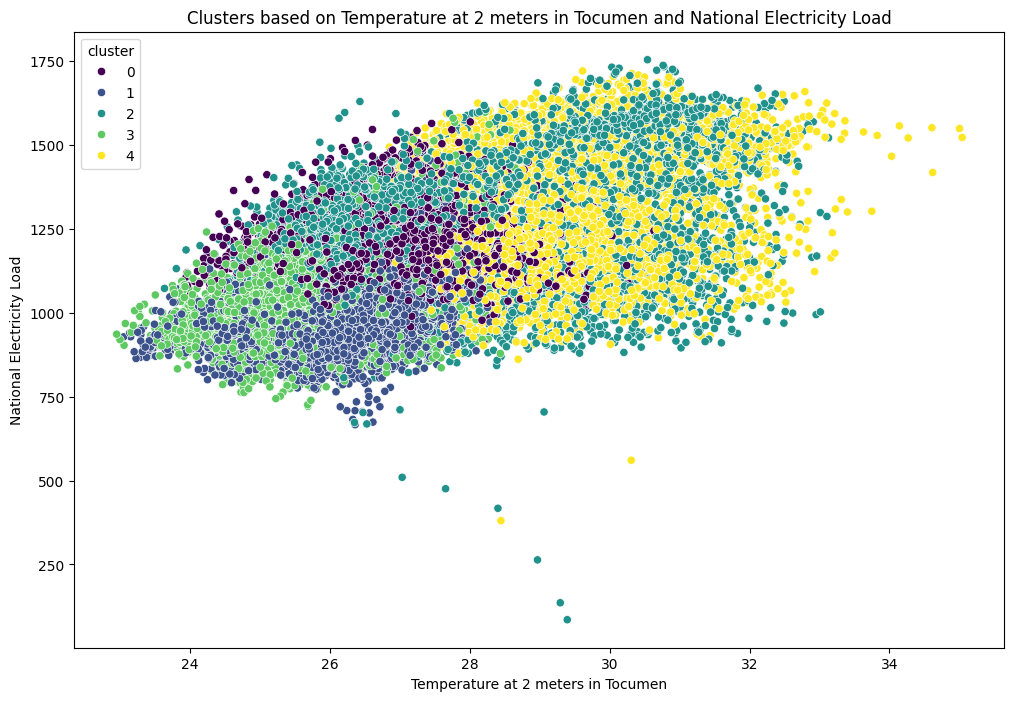

In [7]:
# Analyze clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['T2M_toc'], y=data['nat_demand'], hue=data['cluster'], palette='viridis')
plt.title('Clusters based on Temperature at 2 meters in Tocumen and National Electricity Load')
plt.xlabel('Temperature at 2 meters in Tocumen')
plt.ylabel('National Electricity Load')
plt.show()

In [8]:
# Prepare the data for modeling
X = data.drop(columns=['datetime', 'nat_demand'])
y = data['nat_demand']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [14]:
# Train a Random Forest model with clustering information
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 63.64791961047548


C:\Users\Adarsh Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


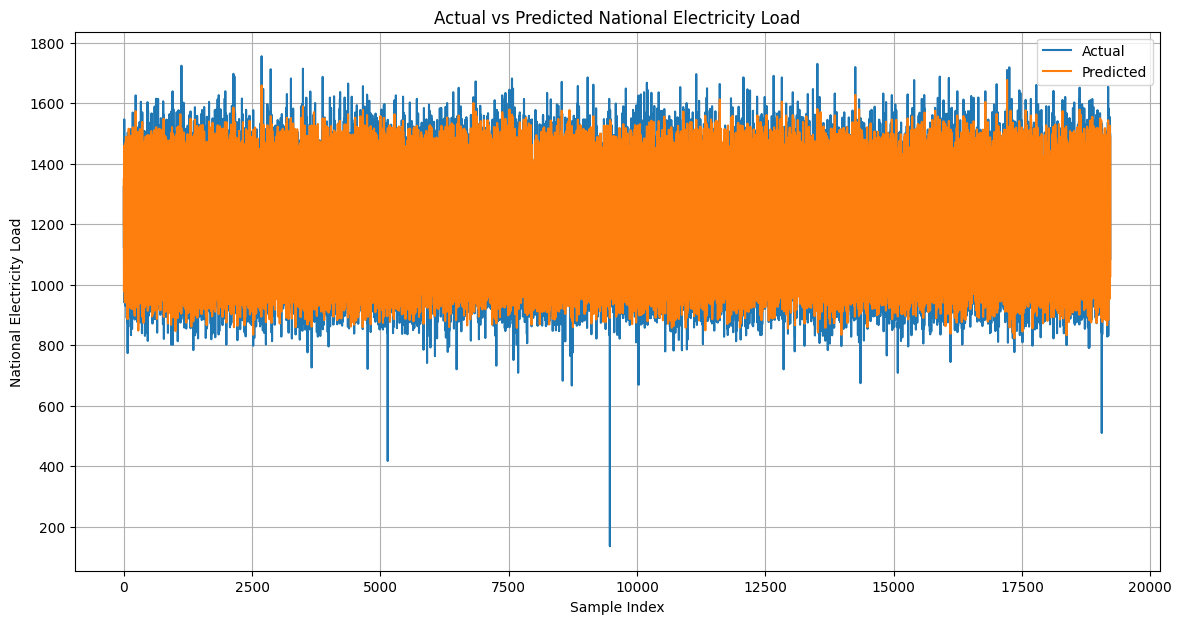

In [16]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('National Electricity Load')
plt.title('Actual vs Predicted National Electricity Load')
plt.legend()
plt.grid(True)
plt.show()